<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li></ul></li><li><span><a href="#Additional-data" data-toc-modified-id="Additional-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Additional data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Movie-Industry-Trends" data-toc-modified-id="Movie-Industry-Trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Movie Industry Trends</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Number of movies released</a></span></li><li><span><a href="#Worldwide-gross" data-toc-modified-id="Worldwide-gross-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Worldwide gross</a></span></li></ul></li><li><span><a href="#Profit-and-Profit-Margin" data-toc-modified-id="Profit-and-Profit-Margin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profit and Profit Margin</a></span></li><li><span><a href="#Impact-of-Budget" data-toc-modified-id="Impact-of-Budget-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Impact of Budget</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Release date</a></span></li><li><span><a href="#Exploring-franchises" data-toc-modified-id="Exploring-franchises-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Exploring franchises</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span></li></ul></div>

<b>Final Project Submission</b>

Please fill out:
* Student name: Nadine Amersi-Belton
* Student pace: part time
* Scheduled project review date/time: TBC
* Instructor name: TBC
* Blog post URL: TBC


# Introduction

## Problem Statement

## Background

# Data Preparation

In [1]:
# We will begin by importing the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from glob import glob
from bs4 import BeautifulSoup
import requests

%matplotlib inline

## Data provided

### Data reading

In [2]:
# Create a list of all csv files using glob
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = file.split('zippedData/')[1].replace(".csv.gz", "").replace(".", "_") #clean filename
    file_df = pd.read_csv(file) #create dataframe
    csv_dict[filename] = file_df #insert dataframe into dictionary with key = filename

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    display(df.head()) #using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


------------------ 

tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


------------------ 

imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


------------------ 

imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


------------------ 

imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


------------------ 

imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


------------------ 

tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


------------------ 

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


------------------ 

imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


------------------ 



In [5]:
# Do the same for tsv files
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.reviews.tsv.gz', './zippedData/rt.movie_info.tsv.gz']

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = file.split('zippedData/')[1].replace(".tsv.gz", "").replace(".", "_") #clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') #create dataframe
    tsv_dict[filename] = file_df #insert dataframe into dictionary with key = filename

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    display(df.head()) #using display instead of print leads to neater formatting in Jupyter Notebook
    print("------------------ \n")

rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


------------------ 

rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


------------------ 



<p style="color:red">TBD: Conclusion: Which DFs to study/ questions to look into</p>

### Data cleaning: tn_movie_budgets

Look at tn_movie_budgets dataframe as it has budget as well as gross. 

In [8]:
#tn_movie_budgets as tnmb
tnmb = csv_dict['tn_movie_budgets']
tnmb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tnmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
# See if any duplicates
tnmb.duplicated().any()

False

In [11]:
# Remove id column
tnmb = tnmb.drop('id', axis = 1)
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
#create new column release_year
#select year from release_date and convert to int
tnmb['release_year']=tnmb['release_date'].map(lambda x: int(x[-4:]))
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [13]:
#convert release_date to a date object
tnmb['release_date'] = pd.to_datetime(tnmb['release_date'])

In [14]:
# define function to clean numbers
def numclean(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int type
    Returns DataFrame
    '''
    df[col]=df[col].str.replace("$","").str.replace(",","").astype('int')
    return df

In [15]:
# Run function on the three columns
numclean(tnmb,'production_budget')
numclean(tnmb,'domestic_gross')
numclean(tnmb,'worldwide_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,2018
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [16]:
#Investigate rows where worldwide-gross is 0
tnmb[tnmb['worldwide_gross'] == 0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,2020-12-31,Moonfall,150000000,0,0,2020
479,2017-12-13,Bright,90000000,0,0,2017
480,2019-12-31,Army of the Dead,90000000,0,0,2019
535,2020-02-21,Call of the Wild,82000000,0,0,2020
670,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0,0,2014
5764,2007-12-31,Tin Can Man,12000,0,0,2007
5771,2015-05-19,Family Motocross,10000,0,0,2015
5777,2018-12-31,Red 11,7000,0,0,2018


In [17]:
len(tnmb[tnmb['worldwide_gross'] == 0])

367

Choose to remove these rows as small percentage of data.

In [18]:
tnmb = tnmb[tnmb['worldwide_gross'] != 0]

In [19]:
tnmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
release_date         5415 non-null datetime64[ns]
movie                5415 non-null object
production_budget    5415 non-null int64
domestic_gross       5415 non-null int64
worldwide_gross      5415 non-null int64
release_year         5415 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [20]:
tnmb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [21]:
#set index to movie
tnmb = tnmb.set_index('movie')

In [22]:
tnmb.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year
movie,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017


This dataframe is ready.

### Data cleaning: imdb_title_basics

In [49]:
#imdb_title_basics as imdb
imdb = csv_dict['imdb_title_basics']

In [50]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [51]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [52]:
# Investigate missing values
imdb.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [53]:
# % of missing values for runtime
(imdb['runtime_minutes'].isna().sum()/len(imdb)*100).round(2)

0.0

In [54]:
# Consider median
imdb['runtime_minutes'].median()

87.0

In [55]:
# fill missing values with median
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(imdb['runtime_minutes'].median())

In [56]:
# % of missing values for genre
(imdb['genres'].isna().sum()/len(imdb)*100).round(2)

3.7

In [57]:
# % of missing values for original_title
(imdb['original_title'].isna().sum()/len(imdb)*100).round(2)

0.01

In [58]:
#drop rows
imdb = imdb.dropna()

In [59]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
tconst             140734 non-null object
primary_title      140734 non-null object
original_title     140734 non-null object
start_year         140734 non-null int64
runtime_minutes    140734 non-null float64
genres             140734 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [60]:
# any duplicates?
imdb.duplicated().any()

False

In [61]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [86]:
# Obtain unique values in genres column
genres = imdb['genres'].unique()
genres[:5]

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama',
       'Comedy,Drama,Fantasy'], dtype=object)

In [87]:
# split genres
splitgenres = []
for genre in genres:
    splitgenres += genre.split(',')
splitgenres[:5]

['Action', 'Crime', 'Drama', 'Biography', 'Drama']

In [88]:
# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [89]:
# turn back to list to be able to sort alphabetically
listofgenres = list(uniquegenres)
sortedgenres = sorted(listofgenres)
sortedgenres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [91]:
# create columns with genres
for genre in sortedgenres:
    imdb[genre] = 0

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# split genres in genres column
imdb['genres'] = imdb['genres'].map(lambda x : x.split(','))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
#reset index
imdb = imdb.reset_index(drop = True)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140729,tt9916428,The Secret of China,The Secret of China,2019,87.0,"[Adventure, History, War]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140730,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140731,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,[Documentary],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140732,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,[Comedy],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# map to columns
for index, genres in enumerate(imdb['genres']):
    for genre in genres:
        imdb.loc[index,genre] = 1

In [98]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# checking it worked
imdb[['genres','Drama']]

,genres,Drama
0,"[Action, Crime, Drama]",1
1,"[Biography, Drama]",1
2,[Drama],1
3,"[Comedy, Drama]",1
4,"[Comedy, Drama, Fantasy]",1
...,...,...
140729,"[Adventure, History, War]",0
140730,[Drama],1
140731,[Documentary],0
140732,[Comedy],0


In [103]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140734 entries, 0 to 140733
Data columns (total 33 columns):
tconst             140734 non-null object
primary_title      140734 non-null object
original_title     140734 non-null object
start_year         140734 non-null int64
runtime_minutes    140734 non-null float64
genres             140734 non-null object
Action             140734 non-null int64
Adult              140734 non-null int64
Adventure          140734 non-null int64
Animation          140734 non-null int64
Biography          140734 non-null int64
Comedy             140734 non-null int64
Crime              140734 non-null int64
Documentary        140734 non-null int64
Drama              140734 non-null int64
Family             140734 non-null int64
Fantasy            140734 non-null int64
Game-Show          140734 non-null int64
History            140734 non-null int64
Horror             140734 non-null int64
Music              140734 non-null int64
Musical            140

In [106]:
# Rename primary title to 'movie' and drop original title
imdb = imdb.rename(columns = {'primary_title':'movie'})
imdb = imdb.drop('original_title', axis = 1)

In [107]:
imdb.head()

,tconst,movie,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"[Action, Crime, Drama]",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"[Biography, Drama]",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,[Drama],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#set index movie
imdb = imdb.set_index('movie')

In [109]:
imdb.head()

,tconst,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie,,,,,,,,,,,,,,,,,,,,,
Sunghursh,tt0063540,2013,175.0,"[Action, Crime, Drama]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
One Day Before the Rainy Season,tt0066787,2019,114.0,"[Biography, Drama]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
The Other Side of the Wind,tt0069049,2018,122.0,[Drama],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sabse Bada Sukh,tt0069204,2018,87.0,"[Comedy, Drama]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
The Wandering Soap Opera,tt0100275,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


This dataframe is ready

<b> Join the two dataframes </b>

Need to consider how to merge as name is not unique identifyer - movies with same name exist

<p style="color:red">TBD: Additional Data - webs scraping to look at franchise</p>

## Additional data

<p style="color:red">Interested in franchises as many if not most have Movie element and way for Microsoft to utilise existing IP.
Introduce Wiki page</p>

### Web scraping

In [125]:
#Obtain details of highest grossing franchises
url = requests.get('https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises')
soup = BeautifulSoup(url.content, 'html.parser')

# Look for tables on wikipedia page.
tables = list(soup.findAll('table', {'class':'wikitable sortable'}))
len(tables)

2

In [126]:
# Look at first table, franchises over $10 billion
table10bil = tables[0]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table10bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]
name = entry.findAll('td')[1].text.strip()
revenue = entry.findAll('td')[3].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[5].text.replace("\n","")
owner = entry.findAll('td')[7].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Pokémon, Revenue: est. $95 billion, Original media : Video game, Owner: Nintendo (trademark)  The Pokémon Company  (Nintendo, Game Freak, Creatures) (copyright)


In [127]:
# Create lists 
names = [entry.findAll('td')[1].text.strip() for entry in entries]
revenues = [entry.findAll('td')[3].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[5].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[7].text.replace("\n","") for entry in entries]

In [128]:
# Create dataframe from lists
df_franchisesover10b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover10b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover10b.head()

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)


In [144]:
# Do the same process to extract the second table
table4bil = tables[1]

# Seperate each entry in the table - start as 1 as 0 is just header
entries = table4bil.findAll('tr')[1:]

# Investigate first entry
entry = entries[0]

name = entry.findAll('td')[1].text.strip()
revenue = entry.findAll('td')[3].text.strip().replace("\n","")
originalmedia = entry.findAll('td')[5].text.replace("\n","")
owner = entry.findAll('td')[7].text.replace("\n","")
print(f"Name: {name}, Revenue: {revenue}, Original media : {originalmedia}, Owner: {owner}")

Name: Grand Theft Auto, Revenue: est. $9.99 billion, Original media : Video game, Owner: Rockstar Games  (Take-Two Interactive)


In [145]:
# Create lists 
names = [entry.findAll('td')[1].text.strip() for entry in entries]
revenues = [entry.findAll('td')[3].text.strip().replace("\n","") for entry in entries]
originalmedias = [entry.findAll('td')[5].text.replace("\n","") for entry in entries]
owners = [entry.findAll('td')[7].text.replace("\n","") for entry in entries]

In [146]:
# Create dataframe from lists
df_franchisesover4b = pd.DataFrame([names, revenues, originalmedias, owners]).transpose()
df_franchisesover4b.columns = ['Name', 'Revenue', 'Original Media', 'Owner']
df_franchisesover4b.head()

,Name,Revenue,Original Media,Owner
0,Grand Theft Auto,est. $9.99 billion,Video game,Rockstar Games (Take-Two Interactive)
1,JoJo's Bizarre Adventure,est. $9.8 billion,Manga,Hirohiko Araki Shueisha (Hitotsubashi Group) ...
2,Thomas & Friends,est. $9.48 billion,Book,Egmont Group Mattel
3,Lineage,est. $9.32 billion,Video game,NCSoft
4,Sesame Street (The Muppets),est. $9.19 billion,Television series,The Muppets Studio (The Walt Disney Company) ...


In [147]:
# Join both tables
df_franchises = df_franchisesover10b.append(df_franchisesover4b)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
52,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
53,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
54,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
55,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


### Data cleaning

In [148]:
# Reset index
df_franchises = df_franchises.reset_index(drop = True)
df_franchises

,Name,Revenue,Original Media,Owner
0,Pokémon,est. $95 billion,Video game,Nintendo (trademark) The Pokémon Company (Ni...
1,Hello Kitty,est. $86 billion,Cartoon character[38],Sanrio
2,Winnie the Pooh,est. $76 billion,Book[59],The Walt Disney Company
3,Mickey Mouse & Friends,est. $74 billion,Animated cartoon,The Walt Disney Company
4,Star Wars,est. $70 billion,Film,Lucasfilm (The Walt Disney Company)
...,...,...,...,...
105,The Hunger Games,est. $4.05 billion[ih],Novel,Scholastic Corporation Lionsgate
106,Magic: The Gathering,est. $4.02 billion,Card game,Wizards of the Coast (Hasbro)
107,Mission: Impossible,$4 billion[ij][571],Television series,Paramount Pictures
108,Strawberry Shortcake,est. $4 billion,Greeting card,American Greetings


In [149]:
# Transform revenue column into integer

In [150]:
microsoft_franchises = df_franchises [(df_franchises['Owner'] == 'Microsoft') | 
                                      (df_franchises['Owner'] == 'Microsoft Studios')] 

In [151]:
microsoft_franchises

,Name,Revenue,Original Media,Owner
71,Minecraft,est. $7.23 billion,Video game,Microsoft Studios
76,Halo,est. $6.5 billion,Video game,Microsoft


# Visualisations and Insights

## Movie Industry Trends

Recall our tnmb dataframe:

In [152]:
tnmb.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year
movie,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017


### Number of movies released

In [153]:
tnmb['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [154]:
#look at number of movies released each decade
bins = [0, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
names = [ 'pre-1920', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', 'post 2010']

In [155]:
tnmb['decade'] = pd.cut(tnmb['release_year'], bins, labels=names)

In [156]:
tnmb

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade
movie,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009,2000s
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,post 2010
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,post 2010
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,post 2010
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017,post 2010
...,...,...,...,...,...,...
Cavite,2006-05-26,7000,70071,71644,2006,2000s
The Mongol King,2004-12-31,7000,900,900,2004,2000s
Following,1999-04-02,6000,48482,240495,1999,1990s


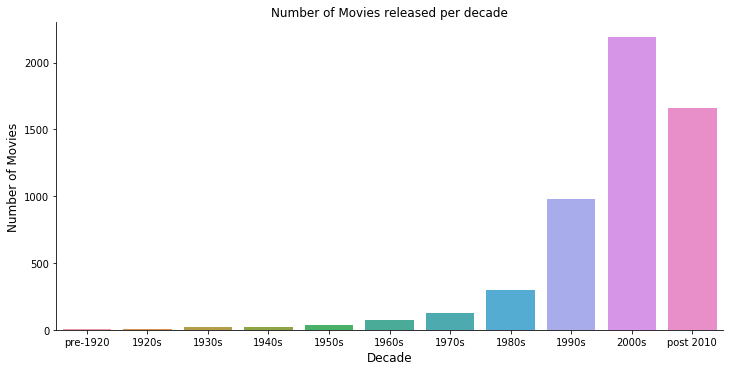

In [157]:
sns.catplot(x = 'decade', kind = 'count', data = tnmb, aspect = 2)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.title('Number of Movies released per decade', fontsize = 12)
plt.show()

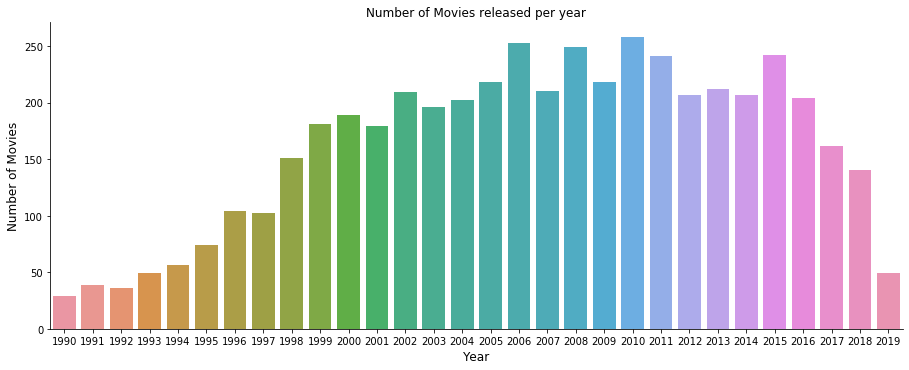

In [158]:
sns.catplot(x = 'release_year', kind = 'count', data = tnmb[tnmb['release_year'] >=1990], aspect = 2.5)
plt.ylabel('Number of Movies', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Movies released per year', fontsize = 12)
plt.show()

Conclusion TBD

### Worldwide gross

In [173]:
avggross

release_year
2000    6.891062e+07
2001    8.187312e+07
2002    7.859938e+07
2003    8.419159e+07
2004    9.101638e+07
2005    8.069514e+07
2006    7.362074e+07
2007    9.053280e+07
2008    8.646697e+07
2009    1.100653e+08
2010    9.392214e+07
2011    1.023870e+08
2012    1.313194e+08
2013    1.243385e+08
2014    1.220963e+08
2015    1.148801e+08
2016    1.410204e+08
2017    1.754915e+08
2018    1.863889e+08
2019    1.362617e+08
Name: worldwide_gross, dtype: float64

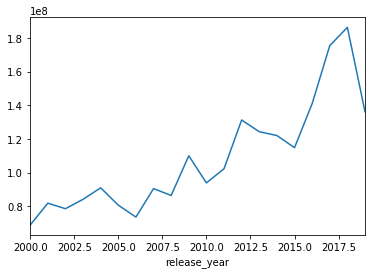

In [174]:
avggross.plot.line()

## Profit and Profit Margin

The business value of this venture relies on making profit.

In [221]:
# create profit column as worldwide_gross less production_budget
tnmb['profit'] = tnmb.apply(lambda x: (x['worldwide_gross']) - (x['production_budget']), axis = 1)

In [222]:
tnmb.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit
movie,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009,2000s,2351345279
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,post 2010,635063875
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,post 2010,-200237650
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,post 2010,1072413963
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017,post 2010,999721747


In [223]:
# Get summary statistics for profit
tnmb['profit'].describe()

count    5.415000e+03
mean     6.437999e+07
std      1.498581e+08
min     -2.002376e+08
25%     -1.862082e+06
50%      1.190000e+07
75%      6.737924e+07
max      2.351345e+09
Name: profit, dtype: float64

In [231]:
# create profit margin column
tnmb['profit_margin'] = tnmb.apply(lambda x: ((x['profit']) / (x['worldwide_gross']))*100, axis = 1)

In [232]:
tnmb['profit_margin'].describe()

count    5.415000e+03
mean    -2.480759e+03
std      5.649863e+04
min     -3.846054e+06
25%     -4.264285e+01
50%      4.694738e+01
75%      7.480333e+01
max      9.994444e+01
Name: profit_margin, dtype: float64

In [237]:
topprofitmargin = tnmb.sort_values('profit_margin', ascending = False)

In [238]:
topprofitmargin.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit,profit_margin
movie,,,,,,,,
Deep Throat,1972-06-30,25000,45000000,45000000,1972,1970s,44975000,99.944444
Mad Max,1980-03-21,200000,8750000,99750000,1980,1970s,99550000,99.799499
Paranormal Activity,2009-09-25,450000,107918810,194183034,2009,2000s,193733034,99.768260
The Gallows,2015-07-10,100000,22764410,41656474,2015,post 2010,41556474,99.759941
The Blair Witch Project,1999-07-14,600000,140539099,248300000,1999,1990s,247700000,99.758357


In [239]:
topprofit = tnmb.sort_values('profit', ascending = False)

In [240]:
topprofit.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit,profit_margin
movie,,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009,2000s,2351345279,84.692106
Titanic,1997-12-19,200000000,659363944,2208208395,1997,1990s,2008208395,90.942884
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,post 2010,1748134200,85.352522
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2053311220,2015,post 2010,1747311220,85.097242
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,post 2010,1433854864,86.960647


## Impact of Budget

In [243]:
tnmb['production_budget'].describe().apply(lambda x: '%.5f' % x)

count         5415.00000
mean      33308006.08532
std       42487580.30276
min           1100.00000
25%        6000000.00000
50%       19000000.00000
75%       42000000.00000
max      425000000.00000
Name: production_budget, dtype: object

In [247]:
bins = [0, 6000000, 19000000, 42000000, np.inf]
names = ['<5m', '6-19m', '19-42m', '>42m']

In [248]:
tnmb['budget_range'] = pd.cut(tnmb['production_budget'], bins, labels=names)

In [250]:
tnmb.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit,profit_margin,budget_range
movie,,,,,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2009,2000s,2351345279,84.692106,>42m
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,2011,post 2010,635063875,60.733080,>42m
Dark Phoenix,2019-06-07,350000000,42762350,149762350,2019,post 2010,-200237650,-133.703598,>42m
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,2015,post 2010,1072413963,76.436443,>42m
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,2017,post 2010,999721747,75.925058,>42m


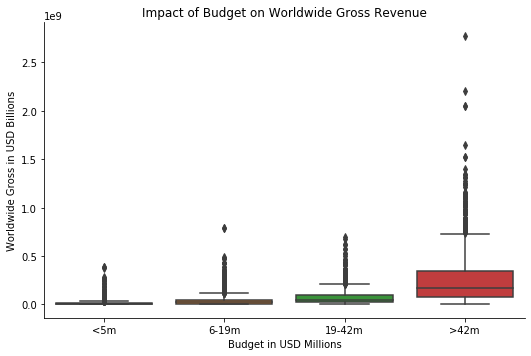

In [292]:
sns.catplot(x = 'budget_range', y = 'worldwide_gross', aspect =1.5, kind = 'box', data = tnmb)
plt.title('Impact of Budget on Worldwide Gross Revenue')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

In [435]:
tnmbrecent = tnmb[tnmb['release_year'] >= 2010]

In [433]:
len(tnmbrecent)

1922

In [443]:
tnmbtopgross = tnmbrecent.sort_values('worldwide_gross', ascending = False)[:100]

In [419]:
tnmbtopgross.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit,profit_margin,budget_range
movie,,,,,,,,,
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2053311220,2015,post 2010,1747311220,85.097242,>42m
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,post 2010,1748134200,85.352522,>42m
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,post 2010,1433854864,86.960647,>42m
Furious 7,2015-04-03,190000000,353007020,1518722794,2015,post 2010,1328722794,87.489488,>42m
The Avengers,2012-05-04,225000000,623279547,1517935897,2012,post 2010,1292935897,85.177240,>42m


In [444]:
tnmbtopgross['production_budget'].describe().apply(lambda x: '%.5f' % x)

count          100.00000
mean     174369000.00000
std       65833935.08739
min       35000000.00000
25%      130000000.00000
50%      170000000.00000
75%      200000000.00000
max      410600000.00000
Name: production_budget, dtype: object

In [445]:
bins = [0, 100000000, 150000000, 200000000, np.inf]
names = ['<100m', '100-150m', '150-200m','>200m' ]

In [446]:
tnmbtopgross['budget_range'] = pd.cut(tnmbtopgross['production_budget'], bins, labels=names)

In [423]:
tnmbtopgross.head()

,release_date,production_budget,domestic_gross,worldwide_gross,release_year,decade,profit,profit_margin,budget_range
movie,,,,,,,,,
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2053311220,2015,post 2010,1747311220,85.097242,>200m
Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,2018,post 2010,1748134200,85.352522,>200m
Jurassic World,2015-06-12,215000000,652270625,1648854864,2015,post 2010,1433854864,86.960647,>200m
Furious 7,2015-04-03,190000000,353007020,1518722794,2015,post 2010,1328722794,87.489488,150-200m
The Avengers,2012-05-04,225000000,623279547,1517935897,2012,post 2010,1292935897,85.177240,>200m


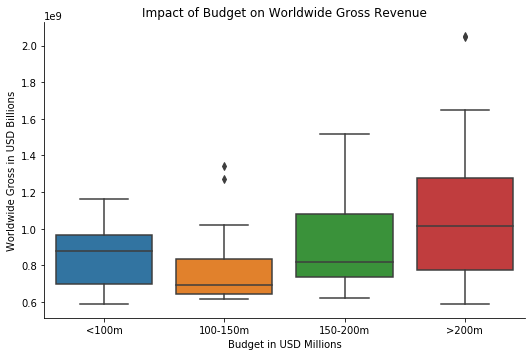

In [447]:
sns.catplot(x = 'budget_range', y = 'worldwide_gross', kind = 'box', aspect = 1.5, data = tnmbtopgross)
plt.title('Impact of Budget on Worldwide Gross Revenue')
plt.xlabel('Budget in USD Millions')
plt.ylabel('Worldwide Gross in USD Billions')
plt.show()

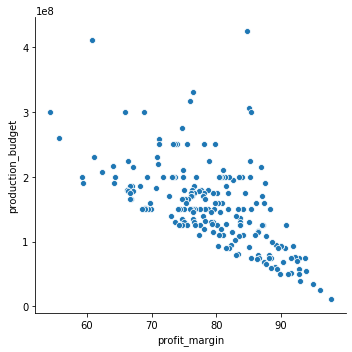

In [388]:
sns.relplot(x = 'profit_margin', y = 'production_budget', data = tnmbtopgross )

## Runtime

Runtime info found in imdb dataframe.

In [184]:
imdb.head()

,tconst,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,Biography,Comedy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
movie,,,,,,,,,,,,,,,,,,,,,
Sunghursh,tt0063540,2013,175.0,"[Action, Crime, Drama]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
One Day Before the Rainy Season,tt0066787,2019,114.0,"[Biography, Drama]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
The Other Side of the Wind,tt0069049,2018,122.0,[Drama],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sabse Bada Sukh,tt0069204,2018,87.0,"[Comedy, Drama]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
The Wandering Soap Opera,tt0100275,2017,80.0,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [185]:
imdb['runtime_minutes'].describe()

count    140734.000000
mean         86.411109
std         149.934410
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

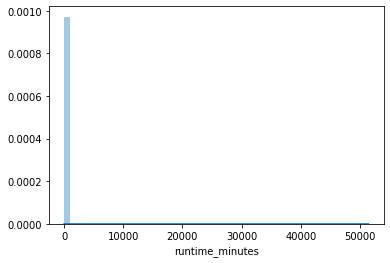

In [186]:
sns.distplot(imdb['runtime_minutes'])

In [187]:
# Merge to be able to compare to gross revenue
movies = pd.merge(tnmb, imdb, on = 'movie')

In [188]:
movies['runtime_minutes'].describe()

count    3379.000000
mean       97.061261
std        26.390150
min         1.000000
25%        87.000000
50%        96.000000
75%       111.000000
max       360.000000
Name: runtime_minutes, dtype: float64

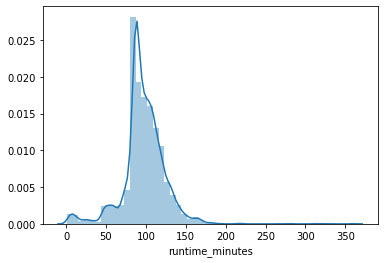

In [189]:
sns.distplot(movies['runtime_minutes'])

In [209]:
topmovies = movies.sort_values('worldwide_gross', ascending = False)[:50]

In [210]:
topmovies['runtime_minutes'].describe()

count     50.00000
mean     119.26000
std       28.49691
min       48.00000
25%       97.25000
50%      123.50000
75%      142.50000
max      169.00000
Name: runtime_minutes, dtype: float64

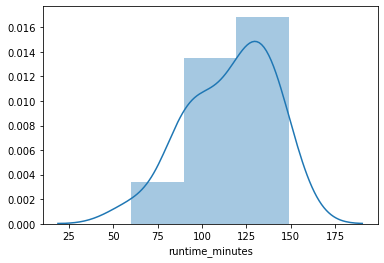

In [192]:
sns.distplot(topmovies['runtime_minutes'])

In [389]:
recentmovies = movies[movies['release_year'] >= 2000]

In [390]:
recentmovies['runtime_minutes'].describe()

count    2921.000000
mean       97.852105
std        26.136798
min         1.000000
25%        87.000000
50%        97.000000
75%       111.000000
max       360.000000
Name: runtime_minutes, dtype: float64

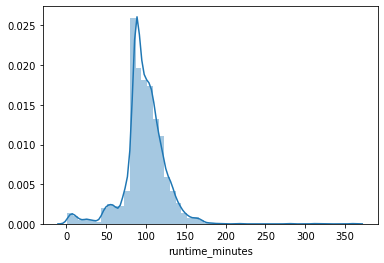

In [391]:
sns.distplot(recentmovies['runtime_minutes'])

In [442]:
recenttopmovies = recentmovies.sort_values('worldwide_gross', ascending = False)[:100]

In [441]:
recenttopmovies['runtime_minutes'].describe()

count    200.000000
mean     108.225000
std       32.868466
min        4.000000
25%       92.750000
50%      108.000000
75%      130.250000
max      180.000000
Name: runtime_minutes, dtype: float64

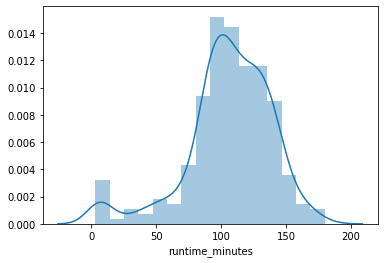

In [409]:
sns.distplot(recenttopmovies['runtime_minutes'])

In [ ]:
movies.head()

## Genre

## Release date

## Exploring franchises

# Conclusion and Future Work

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li></ul></li><li><span><a href="#Additional-data" data-toc-modified-id="Additional-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Additional data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Movie-Industry-Trends" data-toc-modified-id="Movie-Industry-Trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Movie Industry Trends</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Number of movies released</a></span></li></ul></li><li><span><a href="#ROI-and-Budget-Analysis" data-toc-modified-id="ROI-and-Budget-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ROI and Budget Analysis</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Release date</a></span></li><li><span><a href="#Exploring-franchises" data-toc-modified-id="Exploring-franchises-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Exploring franchises</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-provided" data-toc-modified-id="Data-provided-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data provided</a></span><ul class="toc-item"><li><span><a href="#Data-reading" data-toc-modified-id="Data-reading-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data reading</a></span></li><li><span><a href="#Data-cleaning:-tn_movie_budgets" data-toc-modified-id="Data-cleaning:-tn_movie_budgets-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Data cleaning: tn_movie_budgets</a></span></li><li><span><a href="#Data-cleaning:-imdb_title_basics" data-toc-modified-id="Data-cleaning:-imdb_title_basics-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data cleaning: imdb_title_basics</a></span></li></ul></li><li><span><a href="#Additional-data" data-toc-modified-id="Additional-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Additional data</a></span><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Web scraping</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li></ul></li></ul></li><li><span><a href="#Visualisations-and-Insights" data-toc-modified-id="Visualisations-and-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations and Insights</a></span><ul class="toc-item"><li><span><a href="#Movie-Industry-Trends" data-toc-modified-id="Movie-Industry-Trends-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Movie Industry Trends</a></span><ul class="toc-item"><li><span><a href="#Number-of-movies-released" data-toc-modified-id="Number-of-movies-released-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Number of movies released</a></span></li><li><span><a href="#Worldwide-gross" data-toc-modified-id="Worldwide-gross-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Worldwide gross</a></span></li></ul></li><li><span><a href="#Profit-and-Profit-Margin" data-toc-modified-id="Profit-and-Profit-Margin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Profit and Profit Margin</a></span></li><li><span><a href="#Impact-of-Budget" data-toc-modified-id="Impact-of-Budget-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Impact of Budget</a></span></li><li><span><a href="#Runtime" data-toc-modified-id="Runtime-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Runtime</a></span></li><li><span><a href="#Genre" data-toc-modified-id="Genre-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Release-date" data-toc-modified-id="Release-date-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Release date</a></span></li><li><span><a href="#Exploring-franchises" data-toc-modified-id="Exploring-franchises-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Exploring franchises</a></span></li></ul></li><li><span><a href="#Conclusion-and-Future-Work" data-toc-modified-id="Conclusion-and-Future-Work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion and Future Work</a></span></li></ul></div>